In [133]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', 100)  # Set the maximum number of displayed columns to 100
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
import sklearn as sk 
from telecom_churn_utilities import p_r_curve, evaluate_at_threshold, conf_matrix, correlation_bar_graph, correlation_graph, distribution_of_contract_tenure, distribution_of_age_parter_dependent, distribution_of_gender, distribution_of_dataset, customers_used_various_services

In [134]:
# reading a CSV file named 'WA_Fn-UseC_-Telco-Customer-Churn.csv' located in the 'dataset' directory.
# The DataFrame `df` will contain the data from the CSV file, which can be further analyzed and manipulated.
df = pd.read_csv('dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [135]:
#`df.info()` is a method in pandas library that provides a summary of the DataFrame `df`. It displays information about the DataFrame, including the number of rows and columns, the data types of each column, and the memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [136]:
# Converting the values in the 'TotalCharges' column of the DataFrame 'df' to numeric data type. The 'errors='coerce'' argument is used to replace any non-numeric values with NaN (Not a Number).
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

This shows that our datasets has 11 null values in MonthlyCharges columns.

In [137]:
# The code is performing data preprocessing steps on a DataFrame called `df`.
#Removing missing values 
df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)


Lets perform EDA on our dataset.
#### "**Exploratory Data Analysis (EDA)** is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected. EDA is an important first step in any data analysis."

# EDA

## Let us first understand the correlation between dataset numerial features. 

d:\All Projects\Telecom-churn-prediction\telecom_churn_utilities.py:230: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


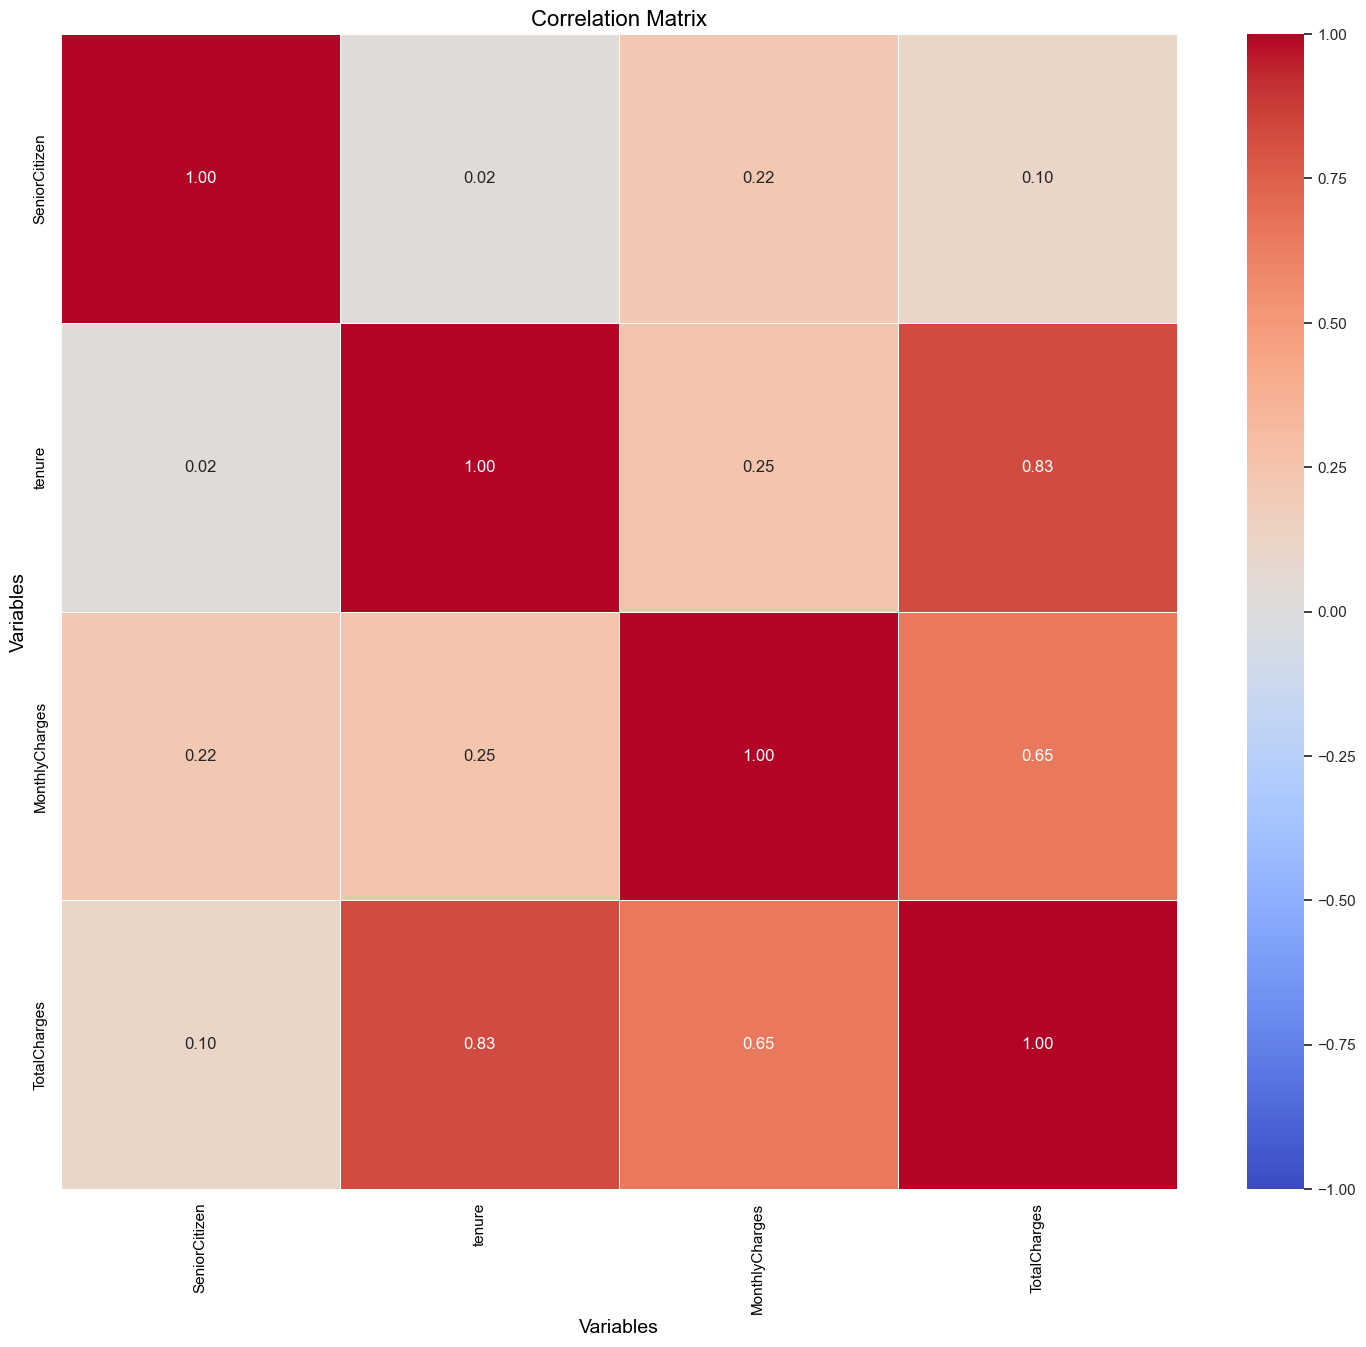

In [138]:
from telecom_churn_utilities import correlation_graph
correlation_graph(df)

## Customer Spending Insights

**Key findings:**

* **Total Charges:**
    * Increases with higher tenure and monthly charges.
    * This implies longer stays and higher monthly charges lead to higher overall spending.

* **Monthly Charges:**
    * Shows some increase with both senior citizen status and tenure.
    * This suggests potentially higher monthly plans or increased usage for senior citizens who tend to stay longer.

* **Senior Citizen and Contract Preference:**
    * The data doesn't definitively show a preference for long-term contracts by senior citizens.
    * Further analysis into contract types and tenure specifically for senior citizens might be needed.


## Data distribution with respect to customer churn.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


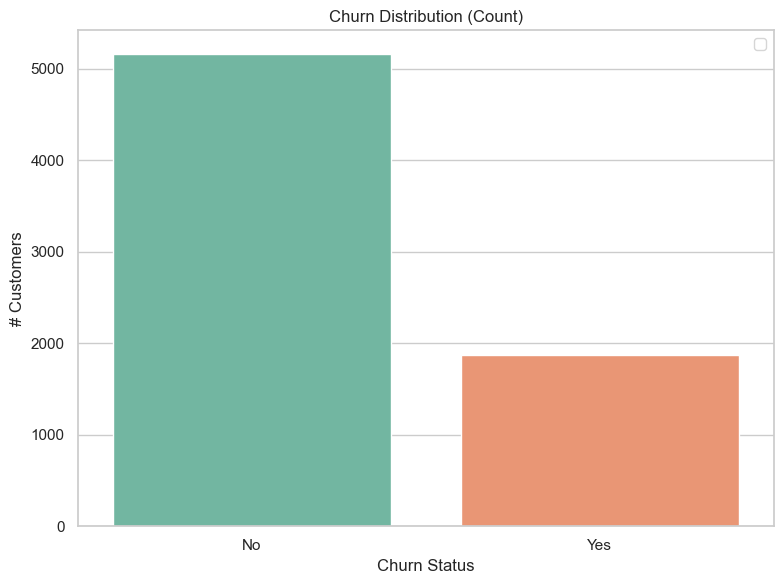

In [139]:
# The code is importing the function `distribution_of_dataset` from the module `telecom_churn_utilities` and then calling the function with the argument `df` as the dataset and `name='Churn'` as the name of the column to analyze. The function is likely used to calculate and display the distribution of values in the specified column of the dataset.
from telecom_churn_utilities import distribution_of_dataset
distribution_of_dataset(df, name='Churn')

In [140]:
# calculating the percentage distribution of the values in the 'Churn' column of the DataFrame 'df'. 
# It first counts the number of occurrences of each unique value in the 'Churn' column using the `value_counts()` method. 
# Then, it divides the counts by the total number of rows in the DataFrame 'df' using the `len(df)` function. Finally, it multiplies the result by 100 to get the percentage distribution.
df['Churn'].value_counts() /len(df) *100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

This show the ***skewness*** in our dataset which we going to fix with class balance techniques. 

## Let us now look at the distribution of various services used by customers

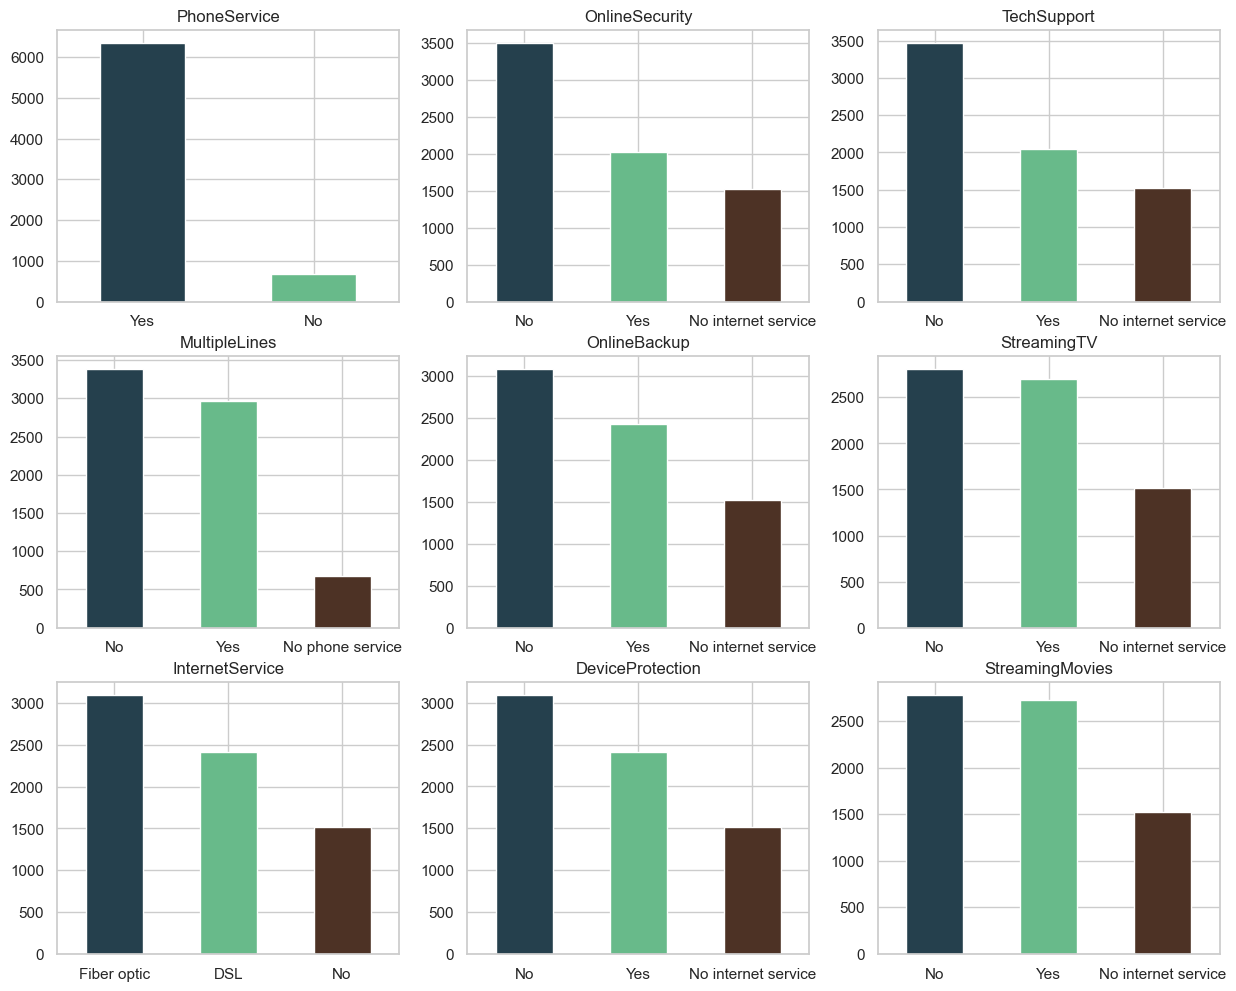

In [141]:
# The code is importing the function `customers_used_various_services` from the module `telecom_churn_utilities` 
# and then calling that function with the argument `df`. This code is likely used to analyze the customers who have used various services in a telecom churn dataset.
from telecom_churn_utilities import  customers_used_various_services
customers_used_various_services(df)

### **Gender Distribution** - Now lets understand the gender distribution.

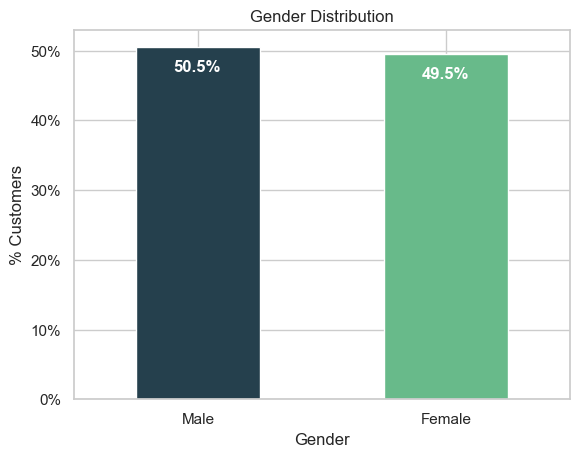

In [142]:
# The code is importing the function `distribution_of_gender` from the module `telecom_churn_utilities` and then calling the function with the argument `df` and the keyword argument `name='gender'`. This code is likely used to analyze the distribution of gender in a dataset `df`.
from telecom_churn_utilities import distribution_of_gender
distribution_of_gender(df, name='gender')

- About half of the customers in our data set are male while the other half are female.

-- Now let us understand the age range, patner and dependent status of the customers --

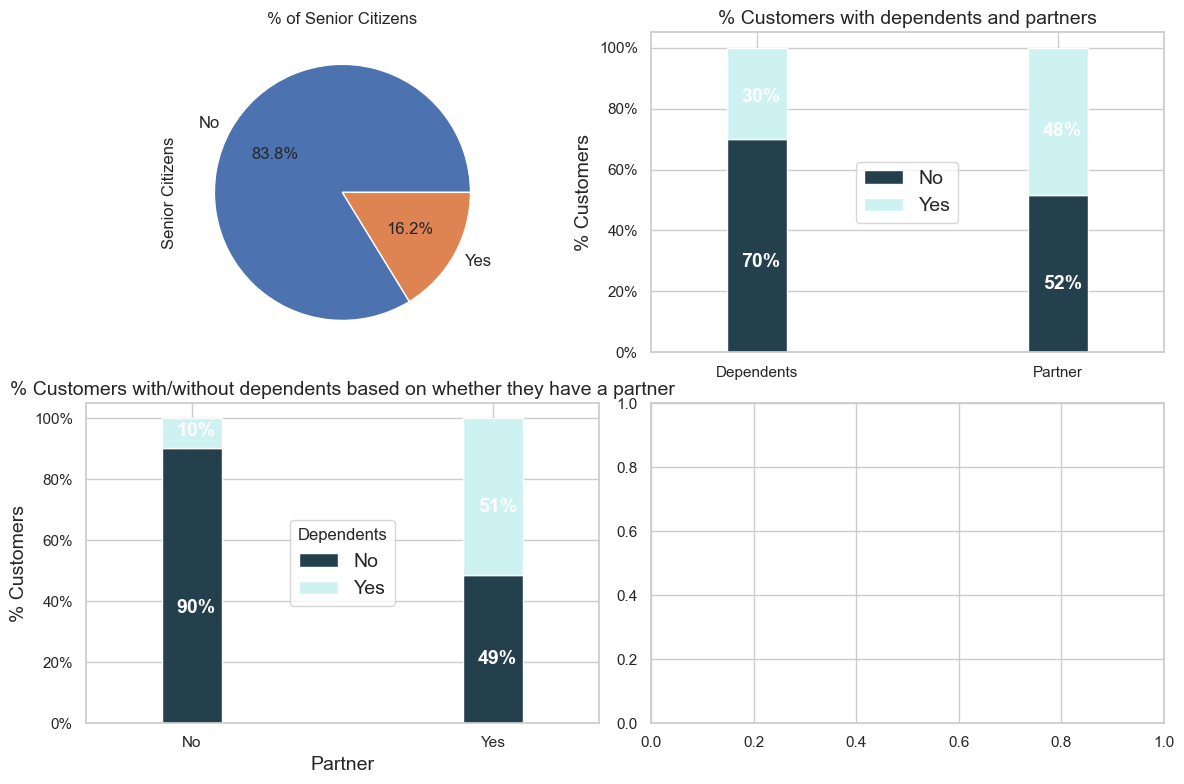

In [143]:
from telecom_churn_utilities import distribution_of_age_parter_dependent
distribution_of_age_parter_dependent(df)

**Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people

**Partner and dependent status** - About 50% of the customers have a partner, while only 30% of the total customers have dependents.
- and the customers whos have partner 50% of them have dependents.

## This is most Important
## Now let us understand the no of customers with respect to tenure Contract.

d:\All Projects\Telecom-churn-prediction\telecom_churn_utilities.py:191: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Contract'] == 'Month-to-month']['tenure'],
d:\All Projects\Telecom-churn-prediction\telecom_churn_utilities.py:203: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['C

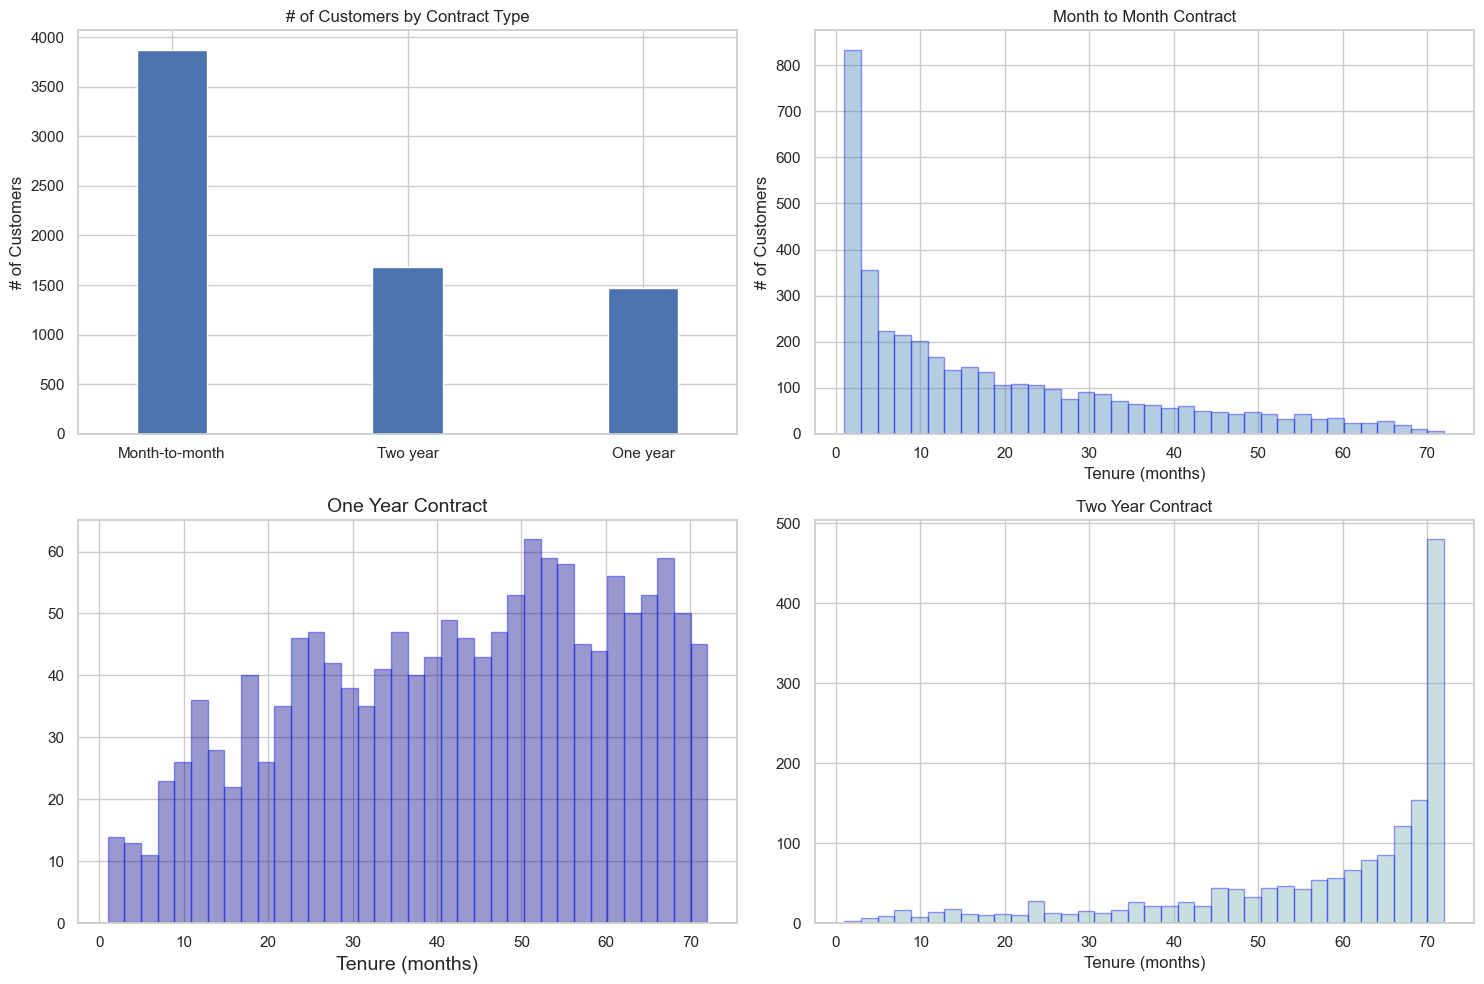

In [144]:
from telecom_churn_utilities import distribution_of_contract_tenure
distribution_of_contract_tenure(df)

## Customer Contract Insights

**Main findings:**

* Most customers prefer month-to-month contracts (flexibility?).
* 2-year contract customers stay longer (70 months vs. 1-2 months).
* Potential link between contract duration and loyalty.

**Further exploration:**

* Reasons for contract choices.
* Benefits/incentives for longer contracts.
* Customer segmentation based on contracts and tenure.

## Now after we done with EDA, the next phase is Anomaly Detection.

----------------------------------------------------------------------------------------------------------------------------------

# Anomaly Detection

### Detection Anomaly in our dataset by using two techniques.
- Ploting box plot.
- Isolation Forest.

### The reason why are we using Numerial features instead of all because categorical data encoded in Labels and Box plot detects anomaly based on data distribution.

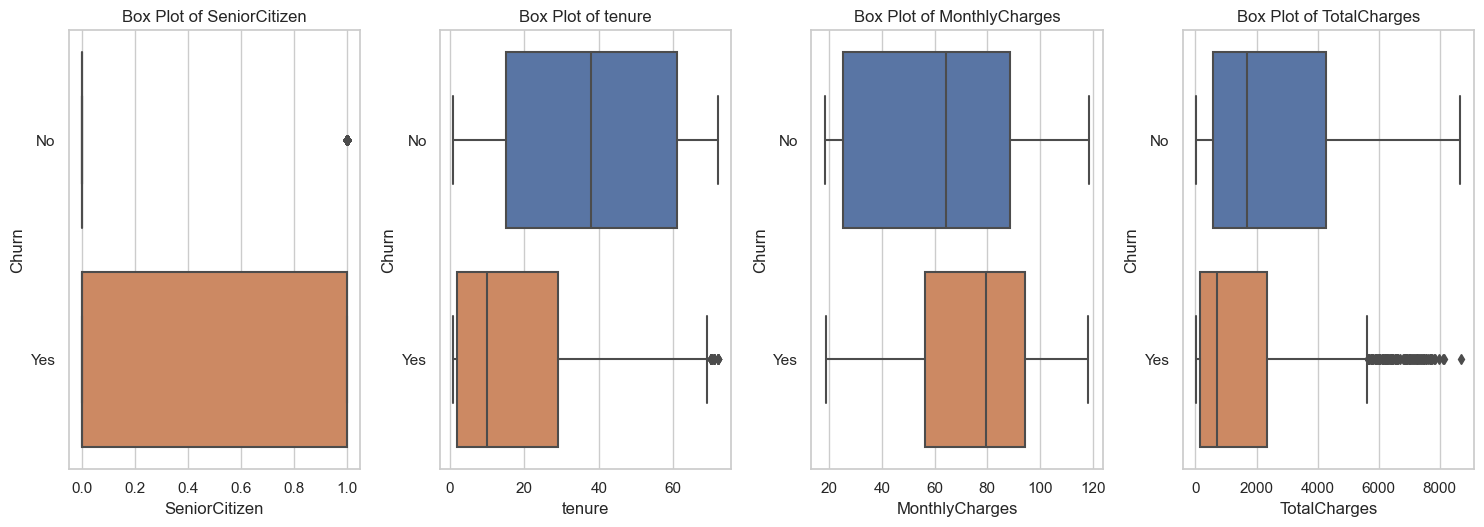

In [145]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Select numeric columns only
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for numeric columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[column], y=df['Churn'])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

The plot let us that the TotalCharges has anomalies. and From EDA we know that the Totalcharges is a very important feature.

And some entiries show that after tenure of 65 months some people left the company which can be misleading to our models.

lets view those anomalies.

In [146]:
df2[((df2['tenure']>65) & (df2['Churn'] == 1))]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
104,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,1
335,Male,0,Yes,Yes,68,Yes,Yes,DSL,No,Yes,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),75.80,5293.95,1
402,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.45,7007.60,1
811,Male,0,No,No,70,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104.00,7250.15,1
975,Male,0,No,No,71,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,108.05,7532.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6537,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.65,7968.85,1
6605,Male,1,No,No,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),110.90,7432.05,1
6824,Female,1,No,No,66,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.45,5224.35,1
6945,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),98.30,6859.50,1


there are total 63 rows so we going to drop them.

In [147]:
print(len(df2))
df2 = df2[~((df2['tenure']>65) & (df2['Churn'] == 1))]
print(len(df2))

7032
6969


## Now lets apply Isolation Forest Algorithm.

For TotalCharges

In [148]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.02))
model.fit(df2[['TotalCharges']])
df2['anomalies_scores'] = model.decision_function(df2[['TotalCharges']])
df2['anomaly'] = model.predict(df2[['TotalCharges']])

In [149]:
df2[df2['anomaly'] == -1]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,anomalies_scores,anomaly
15,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,0,-0.013402,-1
59,Female,0,No,No,72,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.70,0,-0.012064,-1
152,Female,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),108.15,7930.55,0,-0.017432,-1
193,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),109.70,8129.30,0,-0.046671,-1
198,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),112.25,8041.65,0,-0.030319,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6768,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,0,-0.104131,-1
6793,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),108.40,7767.25,0,-0.006687,-1
6799,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Mailed check,111.15,7737.55,0,-0.008051,-1
6859,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,111.30,7985.90,0,-0.027186,-1


Theres 140 rows our anomaly detection algorithm marks as anomaly so,
we going to remove them.

In [150]:
print(len(df2))
df2 = df2[~(df2['anomaly'] == -1)]
print(len(df2))

6969
6830


In [151]:
df2.drop(columns=['anomaly','anomalies_scores'], inplace=True)

These two columns are of no use.

## Now after we done with Anomaly Detection, the next phase is Preprocessing.

----------------------------------------------------------------------------------------------------------------------------------

# Preprocessing

### Let's convert all the categorical variables into dummy variables
Also explained as One Hot Encoding of categorical variables.

In [152]:
# This is a common technique used in machine learning and data analysis to represent categorical variables as binary variables (0 or 1) in order to include them in mathematical models. 
# The resulting DataFrame `df_dummies` will contain the original columns from `df2` along with the newly created dummy variables.
df_dummies = pd.get_dummies(df2)

## Feature Scalling.

In [153]:
# We will use the data frame where we had created dummy variables
# This code is preparing the data for a machine learning model.
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# The `MinMaxScaler` is a data preprocessing technique that scales the features (independent variables) of a dataset to a specified range, typically between 0 and 1. This scaling is done to ensure that all features have a similar scale and to prevent any particular feature from dominating the learning algorithm.
from sklearn.preprocessing import MinMaxScaler
# This line of code is useful for storing the names of the features (independent variables) in a separate variable, which can be helpful for later analysis or model interpretation.
features = X.columns.values
# Scaling all the variables to a range of 0 to 1
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = scaler.transform(X)

# Class Balance

SMOTE (Synthetic Minority Over-sampling Technique)

In [154]:
print(X.shape)
print(y.shape)

(6830, 45)
(6830,)


In [155]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42 )
X, y = smote.fit_resample(X, y)

In [156]:
print(X.shape)
print(y.shape)

(10048, 45)
(10048,)


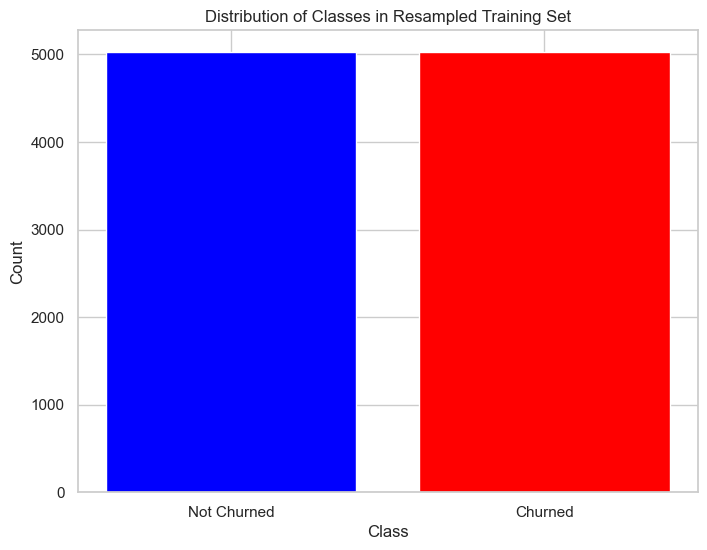

In [157]:
# Plotting bar for the distribution of classes in the resampled training set
plt.figure(figsize=(8, 6))
plt.bar(['Not Churned', 'Churned'], [sum(y == 0), sum(y == 1)], color=['blue', 'red'])
plt.title('Distribution of Classes in Resampled Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [158]:
# Transforming the features (independent variables) in the dataframe `X` using the `transform` method of the `scaler` object. The `transform` method scales the features to a specified range (in this case, between 0 and 1) using the parameters set during the `fit` method.
X = pd.DataFrame(X)
X.columns = features

In [159]:
df_dummies = X.copy()
df_dummies['Churn'] = y

In [160]:
# `X.head(3)` is a method that returns the first 3 rows of the DataFrame or Series `X`.
X.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115595,0.001442,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385650,0.244190,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354758,0.011663,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [161]:
y

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [162]:
# The `shape` attribute of an array returns a tuple representing the dimensions of the array. In this case, 
# it is printing the number of rows and columns in `X` and the number of elements in `y`.
print(X.shape)
print(y.shape)
# The output shows that `X` has 7032 rows and 45 columns, while `y` has 7032 elements.

(10048, 45)
(10048,)


Feature Scalling is ended here.

## Spliting Data into Train Test Split.

In [163]:
# The line is importing the `train_test_split` function from the `model_selection` module of the `sklearn` library. This function is commonly used in machine learning to split a dataset into training and testing sets.
from sklearn.model_selection import train_test_split
# The line of code is splitting the dataset `X` and `y` into training and testing sets. The training set is stored in `X_train` and `y_train`, while the testing set is stored in `X_test` and `y_test`. The `test_size` parameter specifies the proportion of the dataset that should be allocated for testing (in this case, 20% of the data). The `random_state` parameter is used to ensure reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

----------------------------------------------------------------------------------------------------------------------------------

##  Predict the likelihood of churn using a simple Linear Regression model.

# Linear Regression

### Training Linear Regression Model.

In [164]:
# The code is running a linear regression model using the `LinearRegression` class from the `sklearn.linear_model` module.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# The line `result = model.fit(X_train, y_train)` is fitting the linear regression model to the training data.
# It trains the model by finding the best coefficients for the linear equation that minimizes the difference between
# the predicted values and the actual values in the training data.
result = model.fit(X_train, y_train)

### Evaluating the Train Model on X_test split.

In [165]:
# This code snippet is using the scikit-learn library (sklearn) to calculate the accuracy of a machine learning model's predictions.
# It then uses the `predict` method of the `model` object to make predictions on the `X_test` data. The predictions are stored in the `y_pred` variable.
from sklearn import metrics
y_pred = model.predict(X_test)
# Print the prediction accuracy
# The line `print (metrics.mean_squared_error(y_test, y_pred))` is calculating and printing the mean squared error (MSE) between the true values `y_test` and the predicted values `y_pred`. The mean squared error is a common metric used to evaluate the performance of regression models. It measures the average squared difference between the predicted and true values, with lower values indicating better accuracy.
print (metrics.mean_squared_error(y_test, y_pred))

0.1555317076877575


## Spliting Data into Train Test Split.

Our Target Label 'y' has values (0,1) and the linear Regression model predict in continous value. 
The MSE shows the average error which is 0.14018 in term of accuracy we can say that our model is 80% accurate.

## Model Performance

* Target label has values 0, 1 (binary), but the model predicts continuous values.
* MSE of 0.14018 indicates average error, but translating it to 80% accuracy.


## Now using Randomized Search CV for Better model parameters.

**In Randomized Search**, a fixed number of parameter settings is sampled from the specified distributions. Python scikit-learn library implements Randomized Search in its RandomizedSearchCV function. This function needs to be used along with its parameters, such as estimator, param_distributions, scoring, n_iter, cv, etc.

**What is the difference between randomized search CV and GridSearchCV?**

The advantage of RandomizedSearchCV over GridSearchCV is that it allows you to explore a wider range of hyperparameter values in a more efficient way. Since it randomly samples combinations, it can be useful when you have a large search space or when the search space is not well-defined

**An important thing to be noted here:**

Using SGDRegressor instead of linear Regression because LinearRegressor of Sklearn do not have parameter such as Learing Rate and Regularization.



In [166]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import uniform

# Define the Linear Regression model
sgd_reg = SGDRegressor(random_state=42, max_iter=500)

# # Define the Polynomial Features and Standard Scaler in a pipeline
# poly_features = PolynomialFeatures(degree=2, include_bias=False)


# # Create the pipeline
# pipeline = Pipeline([
#     ('poly_features', poly_features),
#     ('sgd_reg', sgd_reg)
# ])
# sgd_reg__
# sgd_reg__
# sgd_reg__
# sgd_reg__
# sgd_reg__
# sgd_reg__

# Define the parameter grid for Randomized Search
param_dist = {
    'loss': ['squared_error',"huber"], # loss function
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], # optimizer
    'eta0': uniform(0.01, 0.1),  # Learning rate parameter
    'alpha': uniform(0.0001, 0.1),  # Regularization strength
    'penalty': ['none', 'l2', 'l1', 'elasticnet'],  # Regularization type
    'l1_ratio': uniform(0, 1),  # L1 ratio for elastic net (only if penalty='elasticnet')
}

# Perform Randomized Search Cross-Validation
search = RandomizedSearchCV(sgd_reg, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
search.fit(X_train, y_train)

# Display the best parameters found
print("Best Parameters:", search.best_params_)


# Print the best parameters and score
print('Best parameters:\n', search.best_params_)
print('Best score:', search.best_score_)


C:\Users\786\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\786\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\786\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\786\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  war

Best Parameters: {'alpha': 0.07090725777960455, 'eta0': 0.012058449429580245, 'l1_ratio': 0.9699098521619943, 'learning_rate': 'adaptive', 'loss': 'huber', 'penalty': 'l2'}
Best parameters:
 {'alpha': 0.07090725777960455, 'eta0': 0.012058449429580245, 'l1_ratio': 0.9699098521619943, 'learning_rate': 'adaptive', 'loss': 'huber', 'penalty': 'l2'}
Best score: 0.3437359617234642


C:\Users\786\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\786\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\786\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\786\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parame

### The Best parameters and The Best Score For SGDRegressor that Randomized Search CV find:
Best parameters:<br>
 sgd_reg__alpha: 0.04514992519695431,<br> sgd_reg__eta0: 0.011326496115986653,<br> sgd_reg__l1_ratio: 0.9422017556848528,<br> sgd_reg__learning_rate: optimal,<br> sgd_reg__loss: huber,<br> sgd_reg__penalty: l2<br>
Best score: 0.23684705469137018

### Now evaluate the model

In [167]:
# Make predictions using the best model
best_model = search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the model's performance using appropriate metrics

print('**Evaluation Metrics:**')
from sklearn.metrics import r2_score, mean_squared_error
print('R-squared:', r2_score(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))

**Evaluation Metrics:**
R-squared: 0.31567696828756264
Mean Squared Error: 0.17078196685166552


Our Main goal here to Predict the likelihood of churn using a simple Linear Regression model.

so, for that purpose we are going to train our best model with whole dataset and make prediction for churn rate.

In [168]:
search.best_params_

{'alpha': 0.07090725777960455,
 'eta0': 0.012058449429580245,
 'l1_ratio': 0.9699098521619943,
 'learning_rate': 'adaptive',
 'loss': 'huber',
 'penalty': 'l2'}

In [169]:
best_model = SGDRegressor(alpha= 0.04514992519695431,
 eta0 =  0.011326496115986653,
 l1_ratio = 0.9422017556848528,
 learning_rate = 'optimal',
 loss = 'huber',
 penalty = 'l2',
 max_iter=1000)  # Create the model instance
best_model.fit(X, y)                  # Fit the model to the data

SGDRegressor(alpha=0.04514992519695431, eta0=0.011326496115986653,
             l1_ratio=0.9422017556848528, learning_rate='optimal',
             loss='huber')

In [170]:
# predicting the output values `y` for the given input data `X` using the `best_model` model. The predicted values are stored in the variable `y_pred`.
y_pred = best_model.predict(X)

In [171]:
# The code is importing the `numpy` library and the `FunctionTransformer` class from the `sklearn.preprocessing` module.
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# The `sigmoid` function is implementing the sigmoid activation function. 
# It takes a numerical input `x` and returns the output of the sigmoid function, 
# which is a value between 0 and 1. The sigmoid function is commonly used in machine learning models to introduce non-linearity and squash the output values to a specific range.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid_transformer = FunctionTransformer(sigmoid)
y_pred = sigmoid_transformer.transform(y_pred)

In [172]:
# This code is applying a sigmoid transformation to the predicted churn rates and assigning the transformed values to the 'churn_rate' column in both the X and df dataframes.
X['churn_risk'] = y_pred
# df['churn_risk'] = y_pred
df_dummies['churn_risk'] = y_pred

----------------------------------------------------------------------------------------------------------------------------------

# Feature Engineering

We have created a new feature churn risk which help us find the high risk customers.

In [173]:
X.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn_risk
0,0.0,0.000000,0.115595,0.001442,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.697659
1,0.0,0.464789,0.385650,0.244190,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.555875
2,0.0,0.014085,0.354758,0.011663,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.642687


In [174]:
# The code `df[df['Churn'] == 'Yes'].describe()` is filtering the DataFrame `df` to only include rows where the value in the 'Churn' column is 'Yes'. Then, it is calculating descriptive statistics for the filtered DataFrame.
df_dummies[df_dummies['Churn'] == 1].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,churn_risk
count,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.0,5024.000000
mean,0.246438,0.204742,0.552529,0.167648,0.495312,0.504688,0.657456,0.342544,0.843232,0.156768,0.091978,0.908022,0.467701,0.091978,0.440322,0.239478,0.699614,0.060908,0.802347,0.060908,0.136745,0.686594,0.060908,0.252499,0.665109,0.060908,0.273984,0.800603,0.060908,0.138489,0.518540,0.060908,0.420552,0.518196,0.060908,0.420896,0.919310,0.071354,0.009337,0.234503,0.765497,0.114675,0.105413,0.611222,0.168691,1.0,0.686999
std,0.408910,0.229408,0.242829,0.202736,0.492515,0.492515,0.467218,0.467218,0.353291,0.353291,0.288853,0.288853,0.493795,0.288853,0.491338,0.424393,0.456224,0.239185,0.387629,0.239185,0.331222,0.456942,0.239185,0.427025,0.465033,0.239185,0.438667,0.389934,0.239185,0.334235,0.494979,0.239185,0.488912,0.495645,0.239185,0.489629,0.262019,0.247412,0.089003,0.413417,0.413417,0.305194,0.293816,0.472152,0.363383,0.0,0.051928
min,0.000000,0.000000,0.005979,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.485591
25%,0.000000,0.016636,0.374190,0.015800,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.790003,0.000000,0.000000,0.000000,0.000000,1.0,0.670189
50%,0.000000,0.113318,0.607374,0.083839,0.377466,0.622534,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.703339
75%,0.452206,0.323944,0.750213,0.250343,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.527432,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.20

### The above table tell us that the customers with churn_risk greater than 0.49% are more likely to Left/switch company.

### After Preprocessing on data let's save our dataset.

In [175]:
prepared_dataset = X.copy()
prepared_dataset['Churn'] = y

In [176]:
prepared_dataset.to_csv('prepared_dataset.csv')

# Lets plot the correlation graph against Customer Churn 

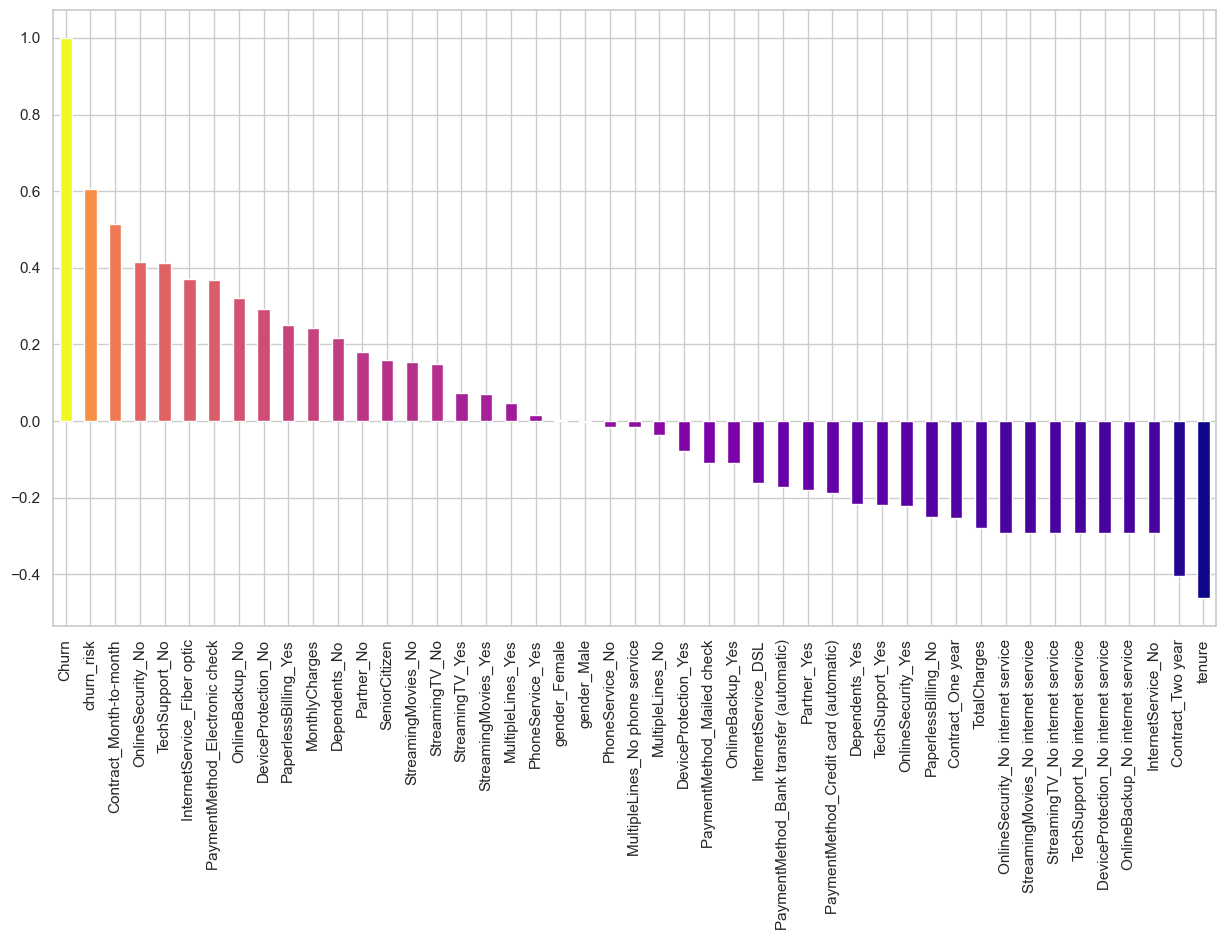

In [177]:
from telecom_churn_utilities import correlation_bar_graph
correlation_bar_graph(df_dummies)

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

---------------------------------------------------------------------------------------------------

### For Various Reasons Training Model on differernt jupiter notebook file.
- 1. It is the the best approach to save model to use it when need and deployment ready.
- 2. Due to lack of insuffienct RAM.
- 3. And to make code more clean and read-able.

---------------------------------------------------------------------------------------------------

# Logistic Regression for binary churn prediction

### Loading model from best_lr .pickle file

In [178]:
import joblib

## Spliting Data into Train Test Split.

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [180]:
best_lr = joblib.load('best_lr.pkl')

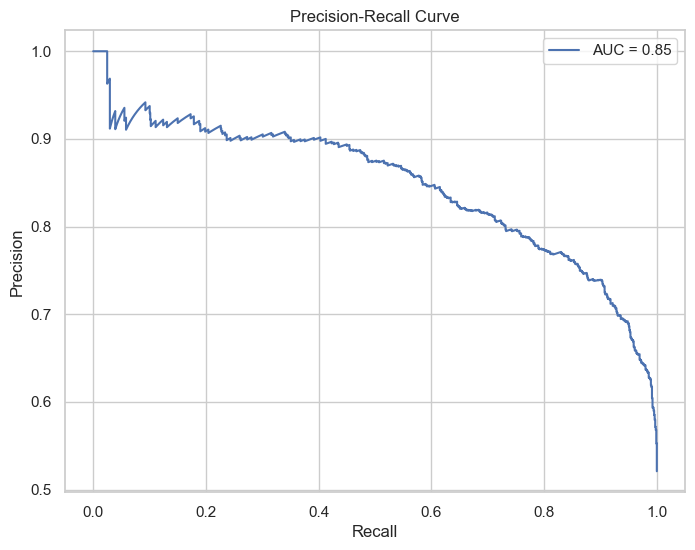

In [181]:
y_proba = best_lr.predict_proba(X_test)[:, 1]
optimal_threshold = p_r_curve(y_test, y_proba)

Threshold: 0.4041101346930017


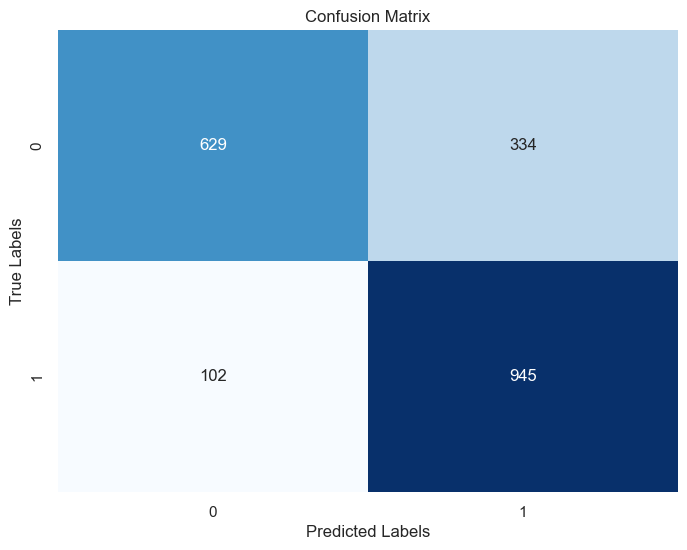

Accuracy: 0.7830845771144279
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.65      0.74       963
           1       0.74      0.90      0.81      1047

    accuracy                           0.78      2010
   macro avg       0.80      0.78      0.78      2010
weighted avg       0.80      0.78      0.78      2010

AUC-ROC Score:
0.7778729912195355




In [182]:
evaluate_at_threshold(y_test, y_proba, optimal_threshold)

### These are weights that our model has learned.

In [183]:
# To get the weights of all the variables
weights = pd.Series(best_lr.coef_[0],
                 index=X.columns.values)
weights

SeniorCitizen                              0.187239
tenure                                    -3.915822
MonthlyCharges                             0.000000
TotalCharges                               1.181810
gender_Female                              0.000000
gender_Male                               -0.026356
Partner_No                                -0.075866
Partner_Yes                                0.000000
Dependents_No                              0.000000
Dependents_Yes                            -0.254376
PhoneService_No                            0.000000
PhoneService_Yes                          -0.308516
MultipleLines_No                          -0.267398
MultipleLines_No phone service             0.000000
MultipleLines_Yes                          0.000000
InternetService_DSL                       -0.000242
InternetService_Fiber optic                0.844406
InternetService_No                         0.000000
OnlineSecurity_No                          0.178029
OnlineSecuri

### Now plot the weights of the Logistic Regression

### The graph down below shows that features which affects the model True postive prediction / Churn in yes.

<Axes: >

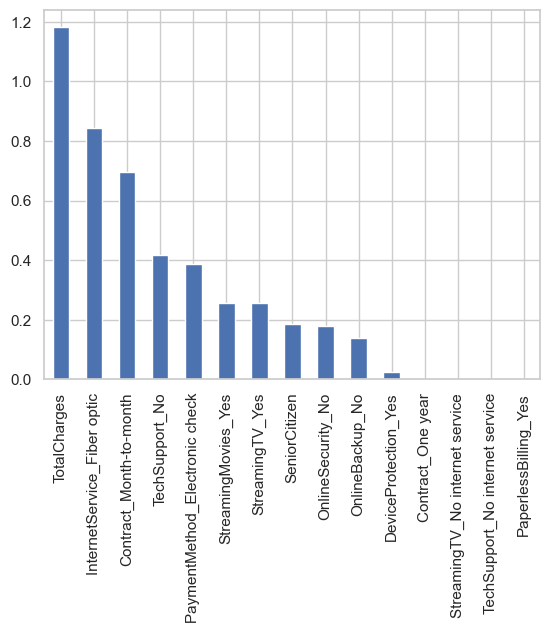

In [184]:
weights.sort_values(ascending = False)[:15].plot(kind='bar')

### The graph down below shows that features which affects the model True Negative prediction / Churn in No.

<Axes: >

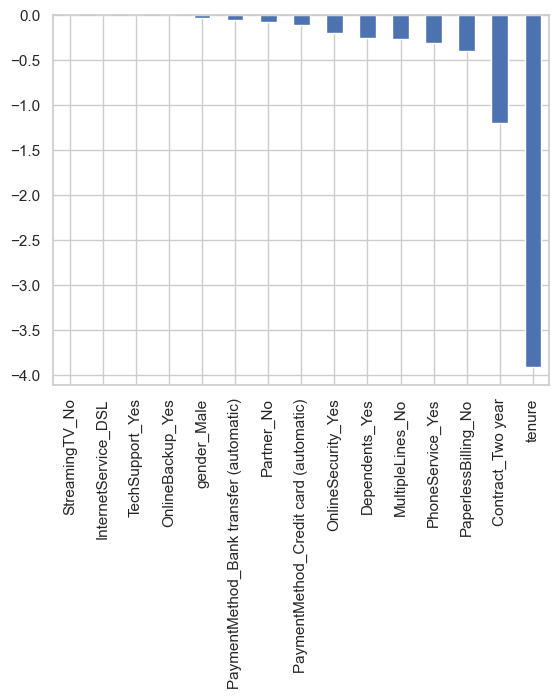

In [185]:
weights.sort_values(ascending = False)[-15:].plot(kind='bar')

----------------------------------------------------------------------------------------------------------------------------------

### Now applying a neural network to capture complex churn patterns

# Neural Network

### Loading Neural Network from best Decision .h5 file

In [192]:
from keras.models import model_from_json

# Load the architecture from JSON
with open("best_nn_model.json", "r") as json_file:
    loaded_model_json = json_file.read()

# Create the model from the JSON
model = model_from_json(loaded_model_json)

# Load the weights into the model
model.load_weights("best_nn_model.h5")

# Now you can use loaded_model to make predictions
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
predictions = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [193]:
# Evaluate the best model (replace with your evaluation metrics)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:',test_loss )

63/63 [==============================] - 0s 1ms/step - loss: 0.2586 - accuracy: 0.8985
Test accuracy: 0.8985074758529663
Test loss: 0.25862714648246765


This model show 89% accuracy but neural network is overfited.

In [190]:
# Get the weights of the neural network model
weights = model.get_weights()
(weights[0][0])

array([-0.79669297,  0.01361586,  0.3550764 ,  0.04627853,  0.05796357,
        0.37828043, -0.10655982,  0.69526803,  0.00960283,  0.26760873,
        0.11951124, -0.28673127,  0.4743255 ,  0.16881171, -2.4165294 ,
        0.42249116,  0.3920712 , -0.44295725, -0.5089134 ,  0.02732939,
       -0.16555905, -0.1618127 , -0.25588   , -0.04351695,  0.24141091,
       -0.2860654 , -0.43303868,  0.05101867,  0.6615924 ,  0.36463127,
       -0.29942194,  0.09408909, -0.48770297,  0.5328734 , -0.14567605,
        0.42506182, -1.2959503 , -0.7317293 ,  0.17670047,  0.28078943,
       -0.01323605,  0.31346118, -0.50094706, -0.1114192 ,  0.10146706,
       -0.00891478,  0.13795604,  0.47655687,  0.19325879, -0.01542414,
       -0.4460469 , -0.839183  ,  0.35696736,  0.5845882 ,  0.02947566,
       -0.23514852, -0.46934566,  0.26965305, -0.70478094, -0.30441296,
        0.24941191,  0.09360775,  0.12603013, -0.06155003, -0.12433264,
       -0.17069069,  0.4037476 , -0.5848279 , -4.3257713 ,  0.33

In [191]:
len(weights[0][0])

128

This show the that the weights capture by the neural network is not equal in lenght of X features

----------------------------------------------------------------------------------------------------------------------------------

# Decision Tree

### Using a Decision Tree to identify key factors influencing churn.

# Loading Decision from best Decision .pickle file

In [198]:
decision_tree = joblib.load('best_decision_tree.pkl')

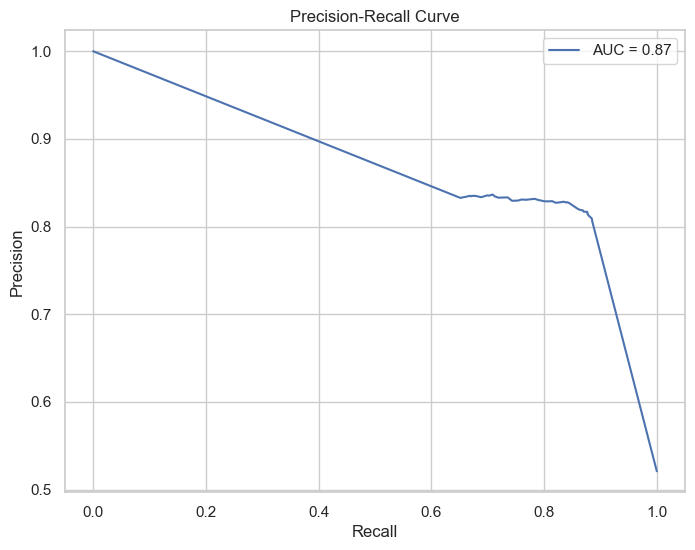

In [199]:
y_proba = decision_tree.predict_proba(X_test)[:, 1]
optimal_threshold = p_r_curve(y_test, y_proba)

Threshold: 0.3333333333333333


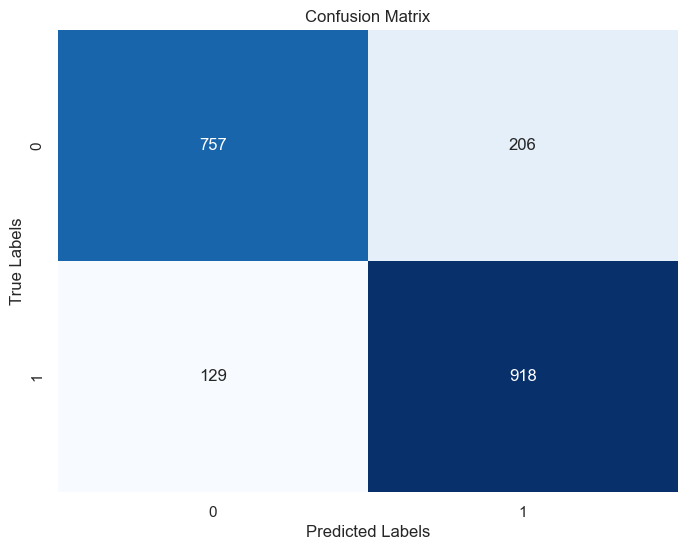

Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       963
           1       0.82      0.88      0.85      1047

    accuracy                           0.83      2010
   macro avg       0.84      0.83      0.83      2010
weighted avg       0.83      0.83      0.83      2010

AUC-ROC Score:
0.8314379907583453




In [200]:
evaluate_at_threshold(y_test, y_proba, optimal_threshold)

<Axes: >

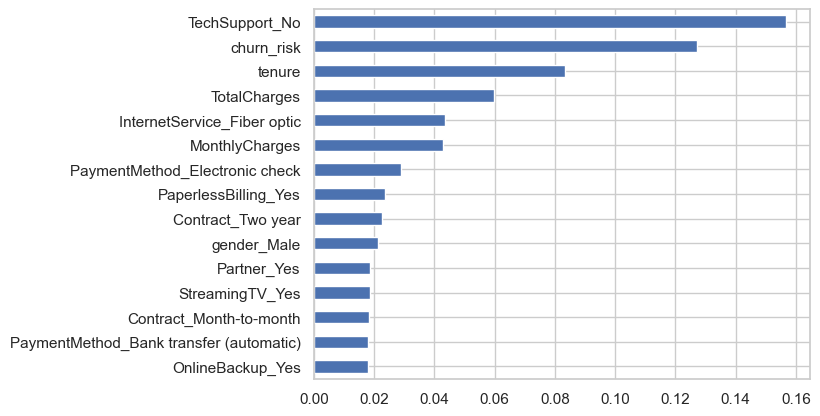

In [201]:
importances = decision_tree.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-15:].plot(kind = 'barh')

## These are the most important feature accurding to decision tree

--------------------------------------------------------------------------------------------------------

# Tree Ensemble

## Random Froest

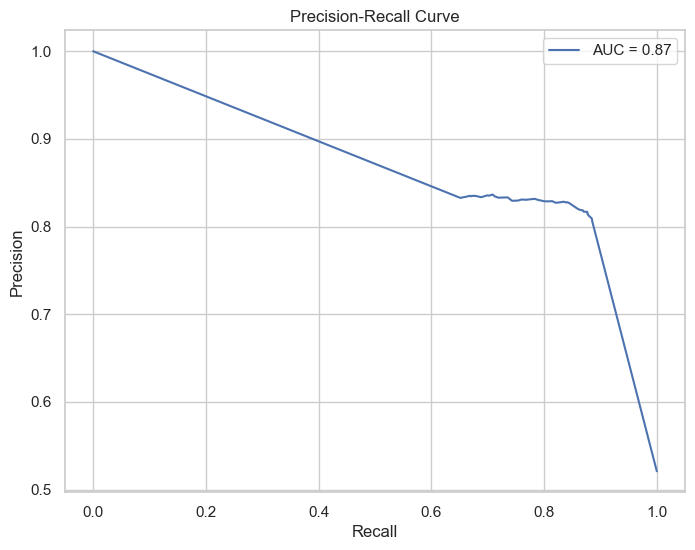

In [202]:
random_forest = joblib.load('random_forest.pkl')
y_proba = decision_tree.predict_proba(X_test)[:, 1]
optimal_threshold = p_r_curve(y_test, y_proba)

Threshold: 0.3333333333333333


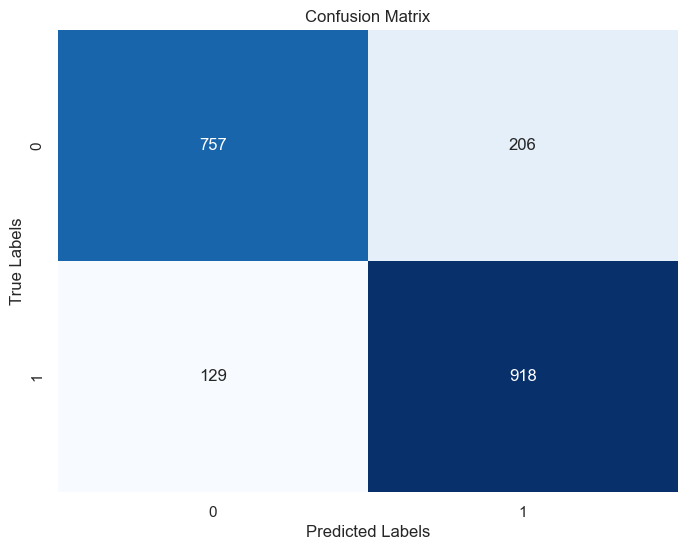

Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       963
           1       0.82      0.88      0.85      1047

    accuracy                           0.83      2010
   macro avg       0.84      0.83      0.83      2010
weighted avg       0.83      0.83      0.83      2010

AUC-ROC Score:
0.8314379907583453




In [203]:
evaluate_at_threshold(y_test, y_proba, optimal_threshold)

<Axes: >

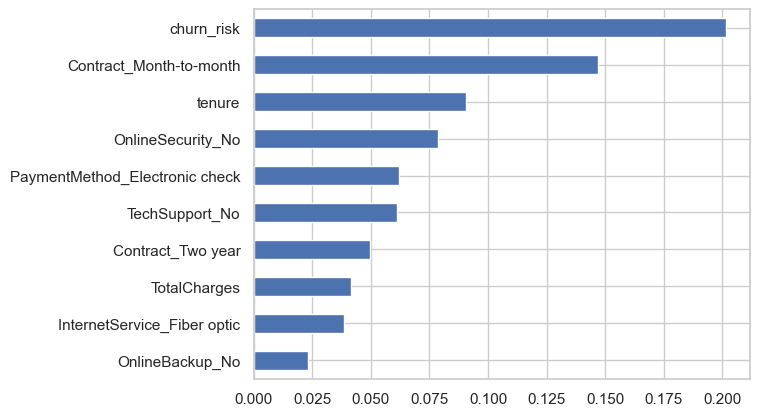

In [206]:
importances = random_forest.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

## These are the most important feature accurding to Random Forest

# XGboost

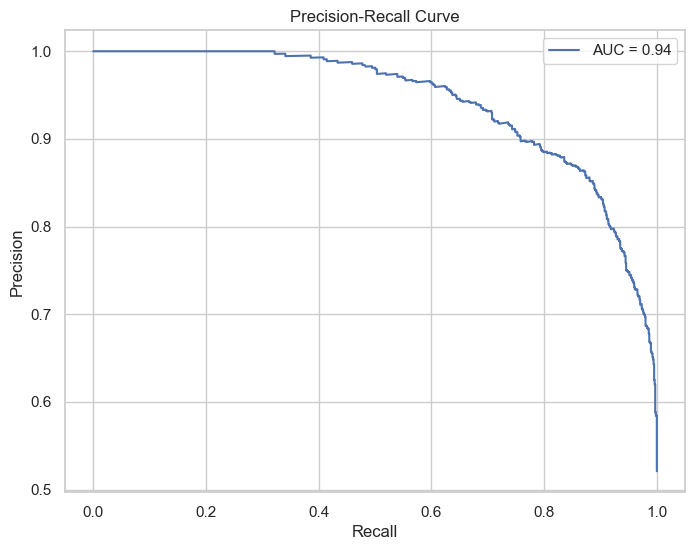

In [204]:
xgboost = joblib.load('xgboost.pkl')
y_proba = xgboost.predict_proba(X_test)[:, 1]
optimal_threshold = p_r_curve(y_test, y_proba)

Threshold: 0.4535098373889923


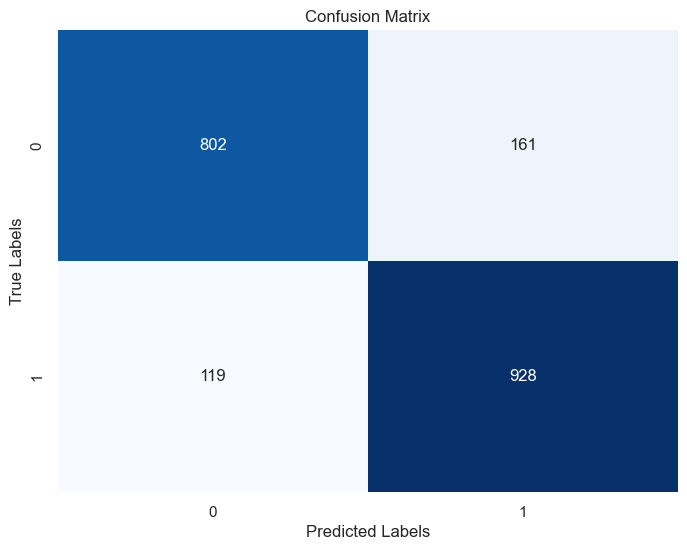

Accuracy: 0.8606965174129353
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       963
           1       0.85      0.89      0.87      1047

    accuracy                           0.86      2010
   macro avg       0.86      0.86      0.86      2010
weighted avg       0.86      0.86      0.86      2010

AUC-ROC Score:
0.8595780259278104




In [205]:
evaluate_at_threshold(y_test, y_proba, optimal_threshold)

<Axes: >

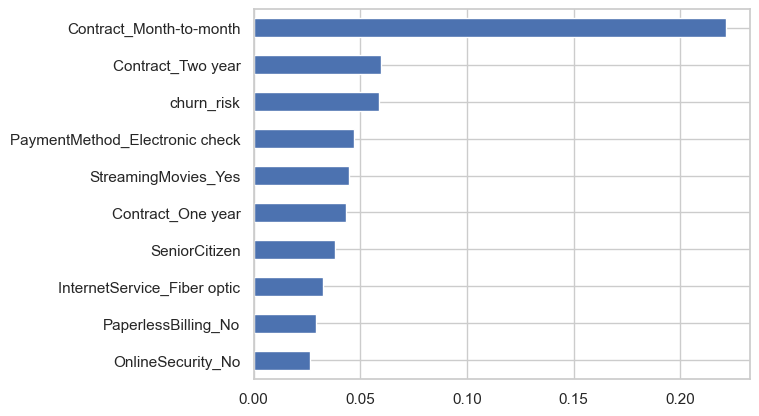

In [207]:
importances = xgboost.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

## Finally the important feature accurding to XGboost algorithm.
## And XGboost has the highest accuracy.